## Random Forest Assignment

In [1]:
# necessary imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

sns.set()
%matplotlib inline

In [3]:
from sklearn import datasets

In [4]:
boston = datasets.load_boston()

In [5]:
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [7]:
features = pd.DataFrame(boston.data, columns = boston.feature_names)
targets = boston.target

In [8]:
target = pd.DataFrame(targets)

In [9]:
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [10]:
target

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


In [11]:
features.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [18]:
features.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [19]:
target.isna().sum()

0    0
dtype: int64

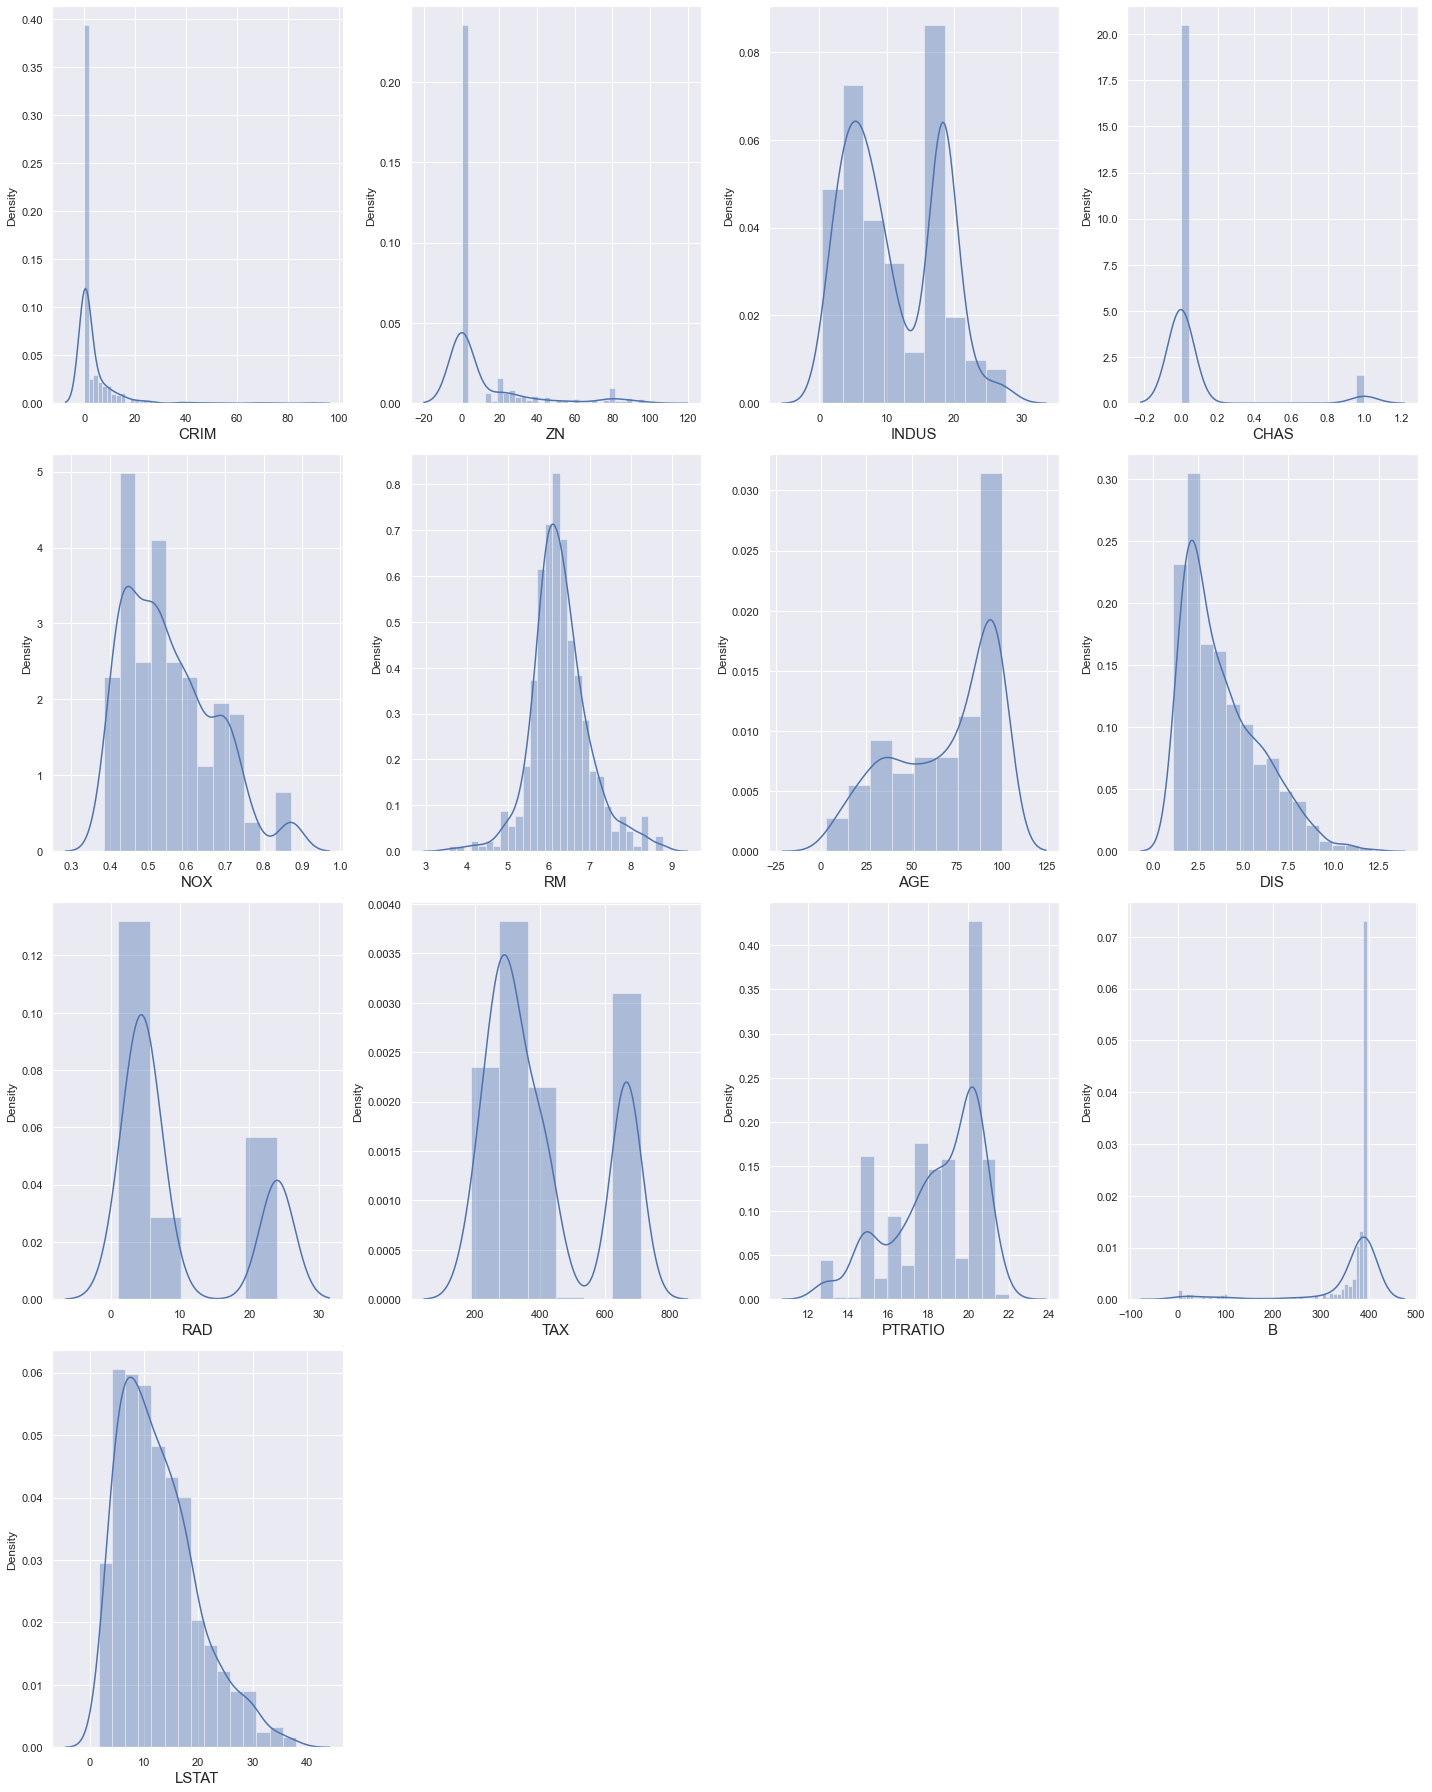

In [17]:
# let's see how data is distributed for every column

plt.figure(figsize = (20, 25))
plotnumber = 1

for column in features:
    if plotnumber <= 13:
        ax = plt.subplot(4, 4, plotnumber)
        sns.distplot(features[column])
        plt.xlabel(column, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

We can see some columns have outliers in the data, we can use standard scaler to handle outliers.

In [20]:
# creating features and label column

X = features
y = target

In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Checking for multicollinearity

In [23]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

vif['vif'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
vif['features'] = X.columns

vif

,vif,features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


"RAD" and "TAX" column have vif greater than 5 so we will remove these columns.

In [24]:
features.drop(columns = ['RAD', 'TAX'], axis = 1, inplace = True)

In [25]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,18.7,396.90,5.33


In [26]:
# splitiing data into training and test data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.30, random_state = 355)

In [28]:
X_train, X_test

(array([[-4.03217373e-01, -4.87722365e-01, -3.75976088e-01, ...,
          1.13022958e+00,  4.17588206e-01, -4.53190706e-01],
        [-3.29257528e-01, -4.87722365e-01, -4.37258013e-01, ...,
          1.17646583e+00,  3.29763695e-01,  2.82721656e-01],
        [-3.86664444e-01, -4.87722365e-01,  1.56899549e+00, ...,
          1.26893833e+00,  3.44346292e-01,  1.61297086e+00],
        ...,
        [-4.13346499e-01, -4.87722365e-01, -9.84418060e-01, ...,
          1.59268345e-01,  8.70128012e-02,  2.37408957e-03],
        [-3.80943536e-01, -4.87722365e-01,  1.56899549e+00, ...,
          1.26893833e+00,  4.20658226e-01, -7.43807526e-03],
        [-4.14909391e-01,  2.94584308e+00, -1.09385007e+00, ...,
         -9.50401638e-01,  3.97084856e-01, -8.52685989e-01]]),
 array([[-0.40296135, -0.48772236,  2.42256516, ...,  0.76033959,
          0.42120644,  0.75791078],
        [-0.38264608, -0.48772236,  1.56899549, ...,  1.26893833,
          0.44105193,  0.38364678],
        [-0.41247486,  1.

In [29]:
y_train, y_test

(        0
 100  27.5
 17   17.5
 140  14.0
 40   34.9
 184  26.4
 ..    ...
 291  37.3
 501  22.4
 346  17.2
 130  19.2
 254  21.9
 
 [354 rows x 1 columns],
         0
 488  15.2
 128  18.0
 191  30.5
 53   23.4
 388  10.2
 ..    ...
 468  19.1
 373  13.8
 126  15.7
 429   9.5
 462  19.5
 
 [152 rows x 1 columns])

In [30]:
# fitting data to model

from sklearn.ensemble import RandomForestRegressor

rand_reg = RandomForestRegressor()
rand_reg.fit(X_train, y_train)

RandomForestRegressor()

In [31]:
# training accuracy

rand_reg.score(X_train, y_train)

0.9819768262107924

In [32]:
# testing accuracy

rand_reg.score(X_test, y_test)

0.8822991526210793

Let's see if accuracy of our model increases after Hyperparameter tuning.

In [36]:
from sklearn.model_selection import GridSearchCV

grid_params = {
    'n_estimators': [90, 100, 115, 120, 130],
    'criterion': ['mse', 'mae'],
    'min_samples_leaf': [1, 2, 3, 4, 5, 6],
    'min_samples_split': [4, 5, 6, 7, 8, 9],
    'max_features': ['auto', 'log2']
}

In [37]:
grid_search = GridSearchCV(rand_reg, grid_params, n_jobs = -1, cv = 5, verbose = 3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  96 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 480 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 1120 tasks      | elapsed:   15.5s
[Parallel(n_jobs=-1)]: Done 1536 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 2016 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 2560 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 3168 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 3600 out of 3600 | elapsed:  1.5min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [4, 5, 6, 7, 8, 9],
                         'n_estimators': [90, 100, 115, 120, 130]},
             verbose=3)

In [38]:
# best paramaters of the model

grid_search.best_params_

{'criterion': 'mse',
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 115}

In [39]:
rand_reg = RandomForestRegressor(criterion = 'mse', max_features = 'auto', min_samples_leaf=1, 
                                min_samples_split=4, n_estimators = 115, n_jobs = -1)
rand_reg.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=4, n_estimators=115, n_jobs=-1)

In [40]:
# training accuracy

rand_reg.score(X_train, y_train)

0.9725834922913013

In [41]:
# testing accuracy

rand_reg.score(X_test, y_test)

0.8799177425278363

In [42]:
grid_params = {
    'n_estimators': [90, 100, 115, 120, 130],
    'criterion': ['mse', 'mae'],
    'min_samples_leaf': [1, 2, 3, 4],
    'min_samples_split': [2, 3, 4, 5, 6],
    'max_features': ['auto', 'log2']
}

In [43]:
grid_search = GridSearchCV(rand_reg, grid_params, n_jobs = -1, cv = 5, verbose = 3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 480 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done 928 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 1296 tasks      | elapsed:   34.5s
[Parallel(n_jobs=-1)]: Done 1648 tasks      | elapsed:   49.6s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   58.7s finished


GridSearchCV(cv=5,
             estimator=RandomForestRegressor(min_samples_split=4,
                                             n_estimators=115, n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5, 6],
                         'n_estimators': [90, 100, 115, 120, 130]},
             verbose=3)

In [44]:
# best paramaters of the model

grid_search.best_params_

{'criterion': 'mae',
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 120}

In [45]:
rand_reg = RandomForestRegressor(criterion = 'mae', max_features = 'log2', min_samples_leaf=1, 
                                min_samples_split=2, n_estimators = 120)
rand_reg.fit(X_train, y_train)

RandomForestRegressor(criterion='mae', max_features='log2', n_estimators=120)

In [46]:
# training accuracy

rand_reg.score(X_train, y_train)

0.9814466523804685

In [47]:
# testing accuracy

rand_reg.score(X_test, y_test)

0.8807198305804683